In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph

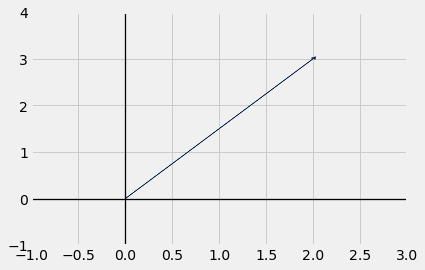

In [7]:
# example vector 
a = [2,
     3]

plt.style.use('fivethirtyeight')

plt.axhline(y = 0, color = 'black', linewidth = 1.3)  
plt.axvline(x = 0, color = 'black', linewidth = 1.3)
            
            
plt.xlim(-1,3)
plt.ylim(-1,4)
plt.arrow(0,0, a[0], a[1], head_width = 0.05, head_length = 0.05, color = '#011f4b')
plt.show();

## 1.2 Create a three-dimensional vecor and plot it on a graph

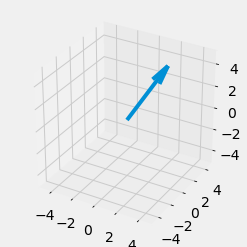

In [89]:
# new vector!

b = [2,
     3,
     4]

plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ax.set_zlim(-5,5)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

ax.grid(True)
ax.quiver(0,0,0,b[0],b[1],b[2],length=1.0)
plt.show();

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

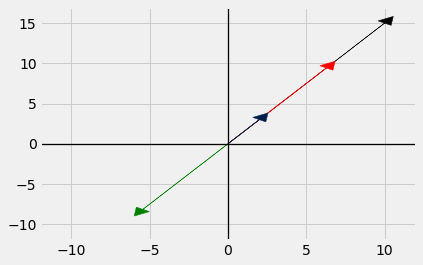

In [35]:
b = np.multiply(5, a)
c = np.multiply(math.pi, a)
d = np.multiply(-math.e, a)

plt.style.use('fivethirtyeight')

plt.axhline(y = 0, color = 'black', linewidth = 1.3)  
plt.axvline(x = 0, color = 'black', linewidth = 1.3)
                    
plt.xlim(-12,12)
plt.ylim(-12,17)

plt.arrow(0,0, b[0], b[1], head_width = 1, head_length = 1, color = 'black')
plt.arrow(0,0, c[0], c[1], head_width = 1, head_length = 1, color = 'red')
plt.arrow(0,0, d[0], d[1], head_width = 1, head_length = 1, color = 'green')
plt.arrow(0,0, a[0], a[1], head_width = 1, head_length = 1, color = '#011f4b')


plt.show();

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

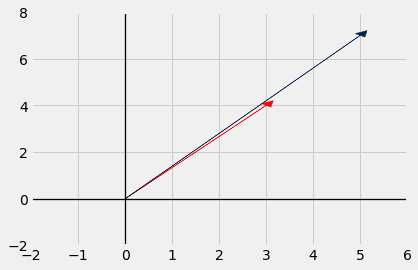

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

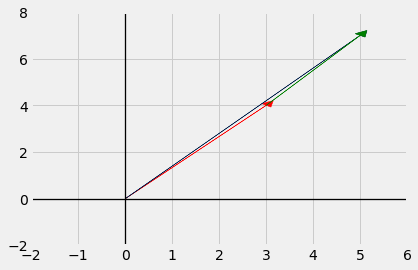

In [48]:
c = np.subtract (a,b)

plt.style.use('fivethirtyeight')

plt.axhline(y = 0, color = 'black', linewidth = 1.3)  
plt.axvline(x = 0, color = 'black', linewidth = 1.3)
                    
plt.xlim(-2,6)
plt.ylim(-2,8)

plt.arrow(0,0, b[0], b[1], head_width = .25, head_length = .25, color = 'red')
plt.arrow(0,0, a[0], a[1], head_width = .25, head_length = .25, color = '#011f4b')
plt.arrow(b[0],b[1], c[0], c[1], head_width = .25, head_length = .25, color = 'green')

plt.show();

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [50]:
c = [7,22,4,17]
d = [12,6,2,9]

In [55]:
def find_dot (a , b):
    if len(a) == len(b):
        s = []
        for i in np.arange(len(a)):
            s.append(a[i] * b[i])
    else: 
        print('Error. Ensure that the two vectors are of equal length.')
    return sum(s)

In [56]:
find_dot(c,d)

377

In [57]:
#Proof!

(c[0]*d[0])+(c[1]*d[1])+(c[2]*d[2])+(c[3]*d[3])

377

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [58]:
e = [5,7,2]
f = [3,4,6]

In [71]:
def find_cross (a,b):
    s = np.add(np.multiply([a[0],b[0]],[a[1],b[1]]),
               np.multiply([a[2],b[2]],[a[1],b[1]]),
               np.multiply([a[0],b[0]],[a[2],b[2]]))
    return s

In [72]:
find_cross(e,f)

array([49, 36])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{e} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [73]:
e = [1,1,1,8]
f = [3,3,3,3]

In [77]:
def find_norm (a):
    l = []
    for i in np.arange(len(a)):
        l.append(a[i]**2)
    s = sum(l)
    return np.sqrt(s)

In [81]:
ee = find_norm(e)
ff = find_norm(f)

if ee > ff: 
    print("Vector 'e' is longer")
elif ff > ee: 
    print("Vector 'f' is longer")
else:
    print('The magnitude of the two vectors is the same')
          

Vector 'e' is longer


In [84]:
#proof

print('||e|| =',ee)
print('||f|| = ',ff)

||e|| = 8.18535277187245
||f|| =  6.0


## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

In [86]:
# if the dot product of two vectors is 0, they are orthogonal

g = [1,0,-1]
h = [1,2**(1/2),1]

find_dot(g,h)

0.0

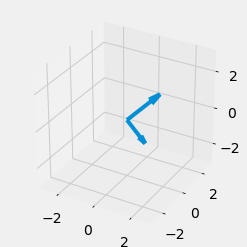

In [261]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ax.set_zlim(-3,3)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

ax.grid(True)
ax.quiver(0,0,0,g[0],g[1],g[2])
ax.quiver(0,0,0,h[0],h[1],h[2])
plt.show();

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

#### Dimensions
- **A** 3 X 2
- **B** 1 X 3
- **C** 2 X 3
- **D** 3 X 3

#### Compatible Matrices

A & C ||| A & E ||| C & D ||| B & D ||| 

C & A ||| E & C ||| D & A ||| D & D |

In [98]:
A = np.array([[1,2],
              [3,4],
              [5,6]])

B = np.array([[2,4,6]])

C = np.array([[9,6,3],
              [4,7,11]])

D = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

E = np.array([[1,3],
              [5,7]])

In [203]:
def matrix_mult (A , B):
    A_col = [column[0] for column in A]
    B_col = [column[0] for column in B]
    matrix = []
    if len(A[0]) == len(B_col):
        
        for r in np.arange(len(A_col)):
            row = []
            for i in np.arange(len(B[0])):
                
                row.append(find_dot(A[r],[column[i] for column in B]))
            matrix.append(row)
        
        return np.array(matrix)
    else:
        print('Make sure the dimensions are correct!')

In [216]:
def find_dimensions (matrix):
    n_columns = len(matrix[0])
    n_rows = len([column[0] for column in matrix])
    
    return n_rows , n_columns

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [228]:
matrices = [[C,D],[A,E],[B,A]]

In [235]:
CD = matrix_mult(C,D)
AE = matrix_mult(A,E)
BA = matrix_mult(B,A)

print('CD:')
print('Dimensions: ', find_dimensions(CD))
print('Product: ')
print( CD )
print()
print('AE:')
print('Dimensions: ', find_dimensions(AE))
print('Product:')
print( AE )
print()
print('BA:')
print('Dimensions: ', find_dimensions(BA))
print('product: ')
print( BA)

CD:
Dimensions:  (2, 3)
Product: 
[[ 9  6  3]
 [ 4  7 11]]

AE:
Dimensions:  (3, 2)
Product:
[[11 17]
 [23 37]
 [35 57]]

BA:
Dimensions:  (1, 2)
product: 
[[44 56]]


The dimensions that result from matrix multiplication match the dimnesions of the first matrix in the pair. 

In [242]:
#proof: 

print(np.matmul(C,D))
print()
print(np.matmul(A,E))
print()
print(np.matmul(B,A))

[[ 9  6  3]
 [ 4  7 11]]

[[11 17]
 [23 37]
 [35 57]]

[[44 56]]


## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

\begin{align}
F^{T} = \begin{bmatrix}
20 & 16 & 12 & 8 & 4 \\
19 & 15 & 11 & 7 & 3 \\
18 & 14 & 10 & 6 & 2 \\
17 & 13 & 9 & 5 & 1 
\end{bmatrix}
\end{align}

- The numbers along the main diagonal remain the same. 
- The Transpose switches the values in the columns and the rows. 
- The dimensions of the transpose is flipped from the dimensions of the origina; (5X4 becomes 4X5)

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

\begin{align}
A = \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\qquad
A^{-1} = \frac{1}{ad-bc}\begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}
\end{align}


<h4><center>therefore...</center></h4>




\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
G^{-1} = \frac{1}{12*10 - 11*7}\begin{bmatrix}
10 & -11\\
-7 & 12
\end{bmatrix}
\end{align}

<h4><center>then...</center></h4>

\begin{align}
\qquad
G^{-1} = \frac{1}{43}\begin{bmatrix}
10 & -11\\
-7 & 12
\end{bmatrix}
\end{align}

<h4><center>finally...</center></h4>

\begin{align}
G^{-1} = \begin{bmatrix}
0.232 & -0.255\\
-0.162 & 0.279
\end{bmatrix}
\end{align}

In [243]:
G = np.array([[12,-.25],
              [7, 10]])

In [247]:
#Proof!

np.linalg.inv(G)

array([[ 0.23255814, -0.25581395],
       [-0.1627907 ,  0.27906977]])

In [248]:
matrix_mult(G, np.linalg.inv(G))

array([[ 1.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00]])

That looks pretty close to the matrix identity. 

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
\end{align}
<h4><center>therefore....</center></h4>
\begin{align}
|H| =$ 12*10 - 11*7 $
\end{align}
<h4><center>so...</center></h4>
\begin{align} 
|H| = 43
\end{align}

\begin{align}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}
<h4><center>therefore...</center></h4>
\begin{align}
|J| = (0*10*0) + (1*4*3) + (2*7*2) - (2*10*3) - (1*7*0) - (0*4*2)
\end{align}
\begin{align}
|J| = 0 + 12 + 28 - 60 - 0 - 0  
\end{align}
\begin{align}
|J| = 40 - 60
\end{align}
\begin{align}
|J| = - 20
\end{align}


In [250]:
H = G
J = np.array([[0,1,2],
              [7,10,4],
              [3,2,0]])

In [260]:
#proof
print(np.linalg.det(H))
print(np.linalg.det(J))

43.0
-19.999999999999996


## 3.3 Find H^{-1} and then find J^{-1}

In [256]:
inv_H = np.linalg.inv(H)
inv_J = np.linalg.inv(J)

print("Inverse of H:")
print(inv_H)
print()
print("Inverse of J")
print(inv_J)

Inverse of H:
[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]

Inverse of J
[[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [258]:
matrix_mult(H, inv_H)

array([[ 1.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00]])

In [259]:
matrix_mult(H, inv_H)

array([[ 1.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  1.00000000e+00]])

#### $HH^{-1} == G^{-1}G$ 
since any matrix multiplied by its inverse == the matrix Identity. 

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

